In [2]:
import keras
import numpy as np
from keras import backend as k 
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
training_path = 'train'
valid_path = 'valid'
testing_path = 'test'

In [5]:
train_batches = ImageDataGenerator().flow_from_directory(training_path, target_size=(224,224), classes=['Hypertensive Retinopathy','Normal'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['Hypertensive Retinopathy','Normal'], batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(testing_path, target_size=(224,224), classes=['Hypertensive Retinopathy','Normal'], batch_size=10)


Found 2472 images belonging to 2 classes.
Found 1274 images belonging to 2 classes.
Found 273 images belonging to 2 classes.


In [4]:
import matplotlib.pyplot as plt
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0] is np.ndarray):
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
imgs , labels = next(train_batches)

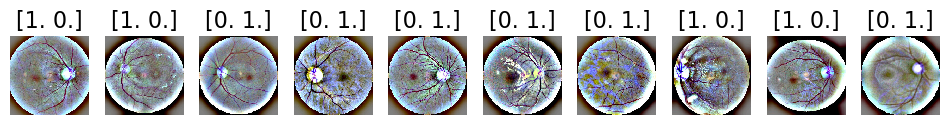

In [6]:
plots(imgs, titles=labels)

In [9]:
import keras
from  keras import applications
vgg16_model = keras.applications.vgg16.VGG16()

In [10]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [13]:
for layer in model.layers:
    layer.trainable = False

In [14]:
model.add(Dense(2, activation='softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [14]:
model.compile(Adam(learning_rate=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history=model.fit(train_batches, steps_per_epoch=4,validation_data=valid_batches, validation_steps=4, epochs=50, verbose=2)

Epoch 1/50
4/4 - 44s - loss: 3.0353 - accuracy: 0.3250 - val_loss: 2.2552 - val_accuracy: 0.1750 - 44s/epoch - 11s/step
Epoch 2/50
4/4 - 40s - loss: 1.3661 - accuracy: 0.3000 - val_loss: 1.1685 - val_accuracy: 0.4500 - 40s/epoch - 10s/step
Epoch 3/50
4/4 - 39s - loss: 0.7578 - accuracy: 0.7000 - val_loss: 0.8313 - val_accuracy: 0.6750 - 39s/epoch - 10s/step
Epoch 4/50
4/4 - 40s - loss: 0.7648 - accuracy: 0.7500 - val_loss: 1.0746 - val_accuracy: 0.7500 - 40s/epoch - 10s/step
Epoch 5/50
4/4 - 39s - loss: 1.4580 - accuracy: 0.6750 - val_loss: 0.6989 - val_accuracy: 0.7750 - 39s/epoch - 10s/step
Epoch 6/50
4/4 - 39s - loss: 1.0720 - accuracy: 0.7000 - val_loss: 0.6463 - val_accuracy: 0.7750 - 39s/epoch - 10s/step
Epoch 7/50
4/4 - 39s - loss: 0.8701 - accuracy: 0.7500 - val_loss: 0.5512 - val_accuracy: 0.8500 - 39s/epoch - 10s/step
Epoch 8/50
4/4 - 40s - loss: 1.1203 - accuracy: 0.5500 - val_loss: 0.8214 - val_accuracy: 0.6250 - 40s/epoch - 10s/step
Epoch 9/50
4/4 - 39s - loss: 0.9227 - ac

In [20]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_batches)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
28/28 [==============================] - 56s 2s/step - loss: 0.2742 - accuracy: 0.8901
Test Accuracy: 89.01098966598511


28/28 [==============================] - 38s 1s/step
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.99      0.52        94
           1       0.83      0.03      0.05       179

    accuracy                           0.36       273
   macro avg       0.59      0.51      0.28       273
weighted avg       0.67      0.36      0.21       273

Area under ROC Curve: 0.5391061452513966


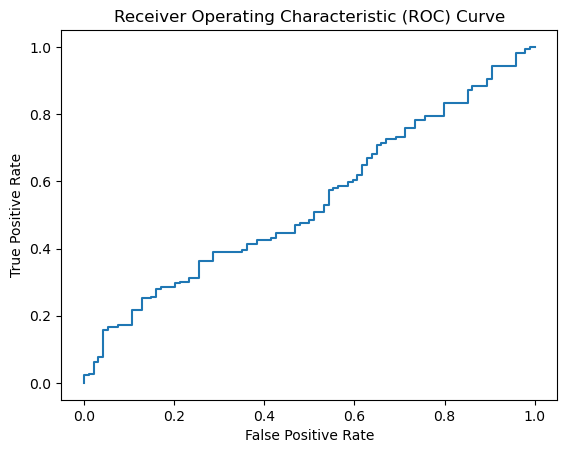

In [22]:
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Assuming you have the true labels and predicted probabilities
true_labels = test_batches.classes
predicted_probabilities = model.predict(test_batches)

# Calculate predicted labels based on the probabilities
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Calculate recall, F1 score, and classification report
report = classification_report(true_labels, predicted_labels)
print("Classification Report:\n", report)

# Calculate area under the ROC curve
roc_auc = roc_auc_score(true_labels, predicted_probabilities[:, 1])
print("Area under ROC Curve:", roc_auc)

# Calculate false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities[:, 1])

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()
